In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

In [2]:
df = pd.read_csv("titanic_toy.csv")

In [3]:
df.head(5)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
x = df.drop("Survived" , axis = 1)
y = df['Survived']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [13]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [14]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [15]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [16]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(median_fare)

In [17]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
755,0.67,14.5000,2,0.67,0.670000,14.5000,14.5000
364,NaN,15.5000,1,28.75,29.785904,15.5000,15.5000
332,38.00,153.4625,1,38.00,38.000000,153.4625,153.4625
872,33.00,5.0000,0,33.00,33.000000,5.0000,5.0000
665,32.00,73.5000,2,32.00,32.000000,73.5000,73.5000


In [18]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2324.2385256705534
Fare Variance after mean imputation:  2340.09102197536


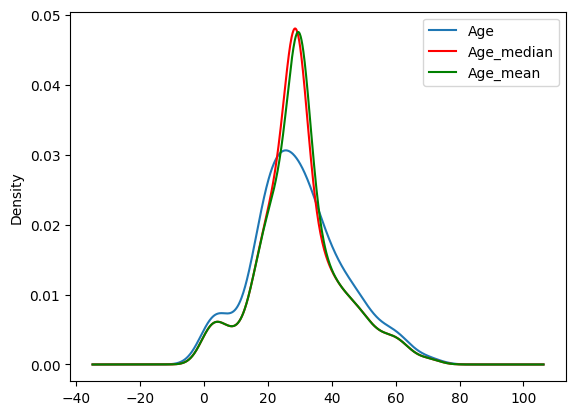

In [23]:
fig = plt.figure()

ax = fig.add_subplot(111)

#original variable distribution

X_train['Age'].plot(kind='kde' , ax = ax)

#variable imputed with the median 

X_train['Age_median'].plot(kind='kde' , ax=ax , color = 'red')

#variable imputed with the mean 

X_train['Age_mean'].plot(kind='kde' , ax=ax , color = 'green')

# add legends 

lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

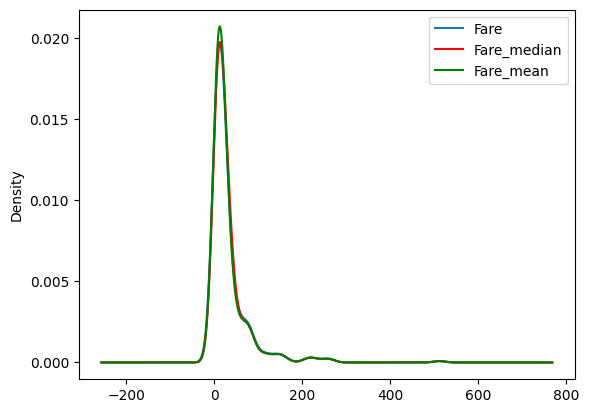

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.385048,16.476305
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,55.023037,53.553455
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Fare_median,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526
Fare_mean,64.858859,2448.197914,16.476305,53.553455,51.358000,2324.238526,2340.091022


In [26]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205499,0.205942
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089673,0.086982
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.086078,0.083461
Fare_median,0.090156,1.000000,0.205499,0.089673,0.086078,1.000000,0.996607
Fare_mean,0.087356,1.000000,0.205942,0.086982,0.083461,0.996607,1.000000


<Axes: >

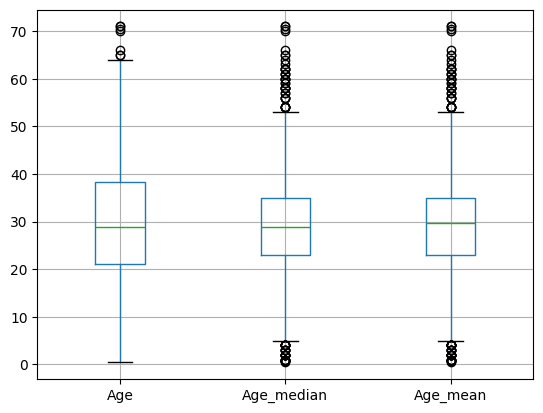

In [27]:
X_train[['Age' , 'Age_median' , 'Age_mean']].boxplot()

<Axes: >

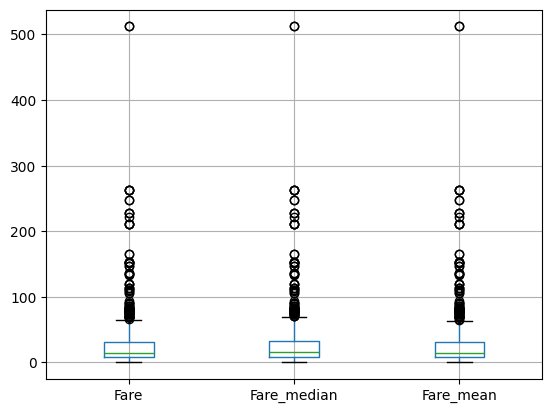

In [28]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# using sklearn

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [31]:

trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [32]:

trf.fit(X_train)

d:\softwerar\pythonPython312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [33]:

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [34]:

trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [35]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [36]:

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])